<a href="https://colab.research.google.com/github/syedghazihaider/LAB-assaingment-/blob/main/24k_7314_ML_for_BA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;">




# ML for BA LAB



---
#### Guidelines
- This is your notebook for your ML for BA Project
- As you might expect, it is **more challenging** so I highly recommend you to work ASAP.

- You are required to submit your answers using this notebook
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**

- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**

---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license.

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder.

---

#### Package imports

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import datetime

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [ ]:
import pandas as pd

## 1. Load the data from file

---

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Iowa_Liquor_sales_sample_10pct.xlsx to Iowa_Liquor_sales_sample_10pct.xlsx


## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes.

In [ ]:
import pandas as pd
import io
df = pd.read_excel(io.BytesIO(uploaded['Iowa_Liquor_sales_sample_10pct.xlsx']))
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   270955 non-null  datetime64[ns]
 1   Store Number           270955 non-null  int64         
 2   City                   270955 non-null  object        
 3   Zip Code               270955 non-null  object        
 4   County Number          269878 non-null  float64       
 5   County                 269878 non-null  object        
 6   Category               270887 non-null  float64       
 7   Category Name          270323 non-null  object        
 8   Vendor Number          270955 non-null  int64         
 9   Item Number            270955 non-null  int64         
 10  Item Description       270955 non-null  object        
 11  Bottle Volume (ml)     270955 non-null  int64         
 12  State Bottle Cost      270955 non-null  floa

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,270955,270955.000000,270955,270955.0,269878.000000,269878,2.708870e+05,270323,270955.00000,270955.000000,270955,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
unique,NaN,NaN,385,415.0,NaN,99,NaN,71,NaN,NaN,2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,DES MOINES,50010.0,NaN,Polk,NaN,VODKA 80 PROOF,NaN,NaN,Black Velvet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,23724,7091.0,NaN,49102,NaN,35373,NaN,NaN,7233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2015-08-20 00:22:11.928917760,3590.263701,NaN,NaN,57.231642,NaN,1.043888e+06,NaN,256.43443,45974.963300,NaN,924.830341,9.773281,14.675760,9.871285,128.902375,8.981351,2.372830
min,2015-01-05 00:00:00,2106.000000,NaN,NaN,1.000000,NaN,1.011100e+06,NaN,10.00000,168.000000,NaN,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000
25%,2015-05-04 00:00:00,2604.000000,NaN,NaN,31.000000,NaN,1.012200e+06,NaN,115.00000,26827.000000,NaN,750.000000,5.500000,8.270000,2.000000,30.450000,1.500000,0.400000
50%,2015-08-19 00:00:00,3722.000000,NaN,NaN,62.000000,NaN,1.031200e+06,NaN,260.00000,38176.000000,NaN,750.000000,8.000000,12.270000,6.000000,70.560000,5.250000,1.390000
75%,2015-12-10 00:00:00,4378.000000,NaN,NaN,77.000000,NaN,1.062310e+06,NaN,380.00000,64573.000000,NaN,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000
max,2016-03-31 00:00:00,9023.000000,NaN,NaN,99.000000,NaN,1.701100e+06,NaN,978.00000,995507.000000,NaN,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000


In [ ]:
file_name = "Iowa_Liquor_sales_sample_10pct.xlsx"
data = pd.read_excel(file_name)
print(f"Dataset Name: {file_name}\n")
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset info:")
print(data.info())
print("\nStatistical summary of numerical columns:")
print(data.describe())
print("\nUnique values in categorical columns:")
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")
print("\nMissing values per column:")
print(data.isnull().sum())

Dataset Name: Iowa_Liquor_sales_sample_10pct.xlsx

First 5 rows of the dataset:
        Date  Store Number         City Zip Code  County Number      County  \
0 2015-11-04          3717       SUMNER    50674            9.0      Bremer   
1 2016-03-02          2614    DAVENPORT    52807           82.0       Scott   
2 2016-02-11          2106  CEDAR FALLS    50613            7.0  Black Hawk   
3 2016-02-03          2501         AMES    50010           85.0       Story   
4 2015-08-18          3654      BELMOND    50421           99.0      Wright   

    Category              Category Name  Vendor Number  Item Number  \
0  1051100.0           APRICOT BRANDIES             55        54436   
1  1011100.0           BLENDED WHISKIES            395        27605   
2  1011200.0  STRAIGHT BOURBON WHISKIES             65        19067   
3  1071100.0         AMERICAN COCKTAILS            395        59154   
4  1031080.0             VODKA 80 PROOF            297        35918   

            Item D


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [ ]:
print(df.isnull().sum())

# Check for inconsistent data types
print(df.dtypes)

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Example: Replace 'nan' values in 'County Number' with 0 (or handle them as appropriate)
df['County Number'] = df['County Number'].fillna(0).astype(int)

# Example: Remove rows with specific issues (e.g., negative sales)
df = df[df['Sale (Dollars)'] >= 0]


Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64
Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle 

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_name = "Iowa_Liquor_sales_sample_10pct.xlsx"
data = pd.read_excel(file_name)

# 1. Clean dollar amount columns
dollar_columns = ['State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)', 'Bottle Cost']
for col in dollar_columns:
    if col in data.columns:
        # Remove dollar signs and commas, then convert to float
        data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)
        print(f"Converted {col} to numeric")

# 2. Clean numeric columns
numeric_columns = ['Store Number', 'Bottles Sold', 'Volume Sold (Liters)']
for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Fixed indentation
        print(f"Ensured {col} is numeric")

# 3. Clean text columns
text_columns = ['Category Name', 'Item Description', 'Store Name', 'Address']
for col in text_columns:
    if col in data.columns:
        data[col] = data[col].str.strip().replace('', np.nan)
        print(f"Cleaned whitespace in {col}")

# 4. Handle missing values
print("\nMissing values before cleaning:")
print(data.isnull().sum())

# Numeric columns: fill with median
for col in data.select_dtypes(include=[np.number]).columns:
    data[col] = data[col].fillna(data[col].median())

# Categorical columns: fill with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

print("\nMissing values after cleaning:")
print(data.isnull().sum())

# 5. Remove duplicates
print(f"\nDuplicate rows found: {data.duplicated().sum()}")
data = data.drop_duplicates()

Converted State Bottle Cost to numeric
Converted State Bottle Retail to numeric
Converted Sale (Dollars) to numeric
Ensured Store Number is numeric
Ensured Bottles Sold is numeric
Ensured Volume Sold (Liters) is numeric
Cleaned whitespace in Category Name
Cleaned whitespace in Item Description

Missing values before cleaning:
Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

Missing values after cleaning:
Date                     0
Store Number             0
City                     0
Zip Co

### 3.2 Clean the columns

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_name = "Iowa_Liquor_sales_sample_10pct.xlsx"
df = pd.read_excel(file_name)

# Display original columns and data types
print("Original columns and data types:")
print(df.dtypes)
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# 1. Clean dollar amount columns (remove $ and convert to float)
money_cols = ['State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)', 'Bottle Cost']
for col in money_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('[\$,]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"Cleaned {col}")

# 2. Clean numeric columns (convert to numeric, handle errors)
num_cols = ['Store Number', 'Zip Code', 'Bottles Sold', 'Volume Sold (Liters)']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"Converted {col} to numeric")

# 3. Clean text columns (strip whitespace, standardize missing values)
text_cols = ['Invoice/Item Number', 'Store Name', 'Address', 'City', 'Category Name', 'Item Description']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].replace(['', 'nan', 'NaN', 'NA', 'N/A'], np.nan)
        print(f"Standardized {col}")

# 4. Handle missing values
# Numeric columns: fill with median
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Text columns: fill with mode or 'Unknown'
for col in df.select_dtypes(include='object').columns:
    mode_val = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
    df[col].fillna(mode_val, inplace=True)

# 5. Remove duplicates
initial_rows = len(df)
df.drop_duplicates(inplace=True)
removed_rows = initial_rows - len(df)
print(f"\nRemoved {removed_rows} duplicate rows")

# 6. Final check
print("\nCleaned data types:")
print(df.dtypes)
print("\nMissing values after cleaning:")
print(df.isnull().sum())
print("\nSample cleaned data:")
print(df.head(3))

Original columns and data types:
Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)               object
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

Missing values before cleaning:
Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category            

<ipython-input-12-1edd2375c338>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-12-1edd2375c338>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin


Removed 35 duplicate rows

Cleaned data types:
Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                        float64
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)               object
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

Missing values after cleaning:
Date                     0
Store Number             0
City                     0
Zip Code                 0
County Number            0
County                   0
Category                


### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel("Iowa_Liquor_sales_sample_10pct.xlsx")

# 1. Initial Data Inspection
print("Initial data shape:", df.shape)
print("\nData types before cleaning:")
print(df.dtypes)
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# 2. Advanced String Cleaning
text_cols = ['Item Description', 'Category Name', 'Store Name', 'Address', 'City']
for col in text_cols:
    if col in df.columns:
        # Standardize text (lowercase, remove special chars, fix whitespace)
        df[col] = df[col].astype(str).str.lower()
        df[col] = df[col].str.replace(r'[^\w\s]', '', regex=True)
        df[col] = df[col].str.replace(r'\s+', ' ', regex=True).str.strip()

        # Handle common abbreviations and synonyms
        df[col] = df[col].replace({
            'btl': 'bottle',
            'vodk': 'vodka',
            'whisky': 'whiskey',
            '750ml': '750 ml',
            '1l': '1 liter',
            '\.0$': ''  # Remove trailing .0 for whole numbers
        }, regex=True)

# 3. Clean Numeric and Money Columns
# Dollar amounts
money_cols = ['State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)', 'Bottle Cost']
for col in money_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('[\$,]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"Cleaned {col}")

# Other numeric columns
num_cols = ['Store Number', 'Zip Code', 'Bottles Sold', 'Volume Sold (Liters)', 'Bottle Volume']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"Converted {col} to numeric")

# 4. Logical Consistency Checks
# Validate bottle volume vs. volume sold
if 'Bottle Volume' in df.columns and 'Volume Sold (Liters)' in df.columns:
    df['Calculated Volume'] = df['Bottles Sold'] * df['Bottle Volume'] / 1000
    volume_discrepancy = np.abs(df['Calculated Volume'] - df['Volume Sold (Liters)']) > 0.1
    print(f"\nFound {volume_discrepancy.sum()} records with volume discrepancies")
    df.loc[volume_discrepancy, 'Volume Sold (Liters)'] = df.loc[volume_discrepancy, 'Calculated Volume']
    df = df.drop(columns=['Calculated Volume'])

# 5. Outlier Detection and Treatment
numeric_cols = ['State Bottle Retail', 'Sale (Dollars)', 'Bottles Sold']
for col in numeric_cols:
    if col in df.columns:
        # Calculate bounds using IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        print(f"Capped outliers in {col}")

# 6. Category Consolidation
if 'Category Name' in df.columns:
    # Group similar categories
    category_mapping = {
        'canadian whisky': 'whiskey',
        'scotch whisky': 'whiskey',
        'irish whisky': 'whiskey',
        'american vodka': 'vodka',
        'imported vodka': 'vodka',
        'tequila': 'tequila/mezcal',
        'mezcal': 'tequila/mezcal'
    }
    df['Category Name'] = df['Category Name'].replace(category_mapping)

# 7. Address Standardization
if 'Address' in df.columns and 'City' in df.columns and 'Zip Code' in df.columns:
    # Create consistent location identifier
    df['Location ID'] = (df['Address'].str[:15] + '|' +
                         df['City'] + '|' +
                         df['Zip Code'].astype(str).str[:5])

    # Fix known store naming inconsistencies
    if 'Store Name' in df.columns:
        df['Store Name'] = df.groupby('Location ID')['Store Name'].transform(
            lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0])

# 8. Temporal Consistency (if Date column exists)
if 'Date' in df.columns:
    # Convert to datetime (handling multiple formats)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Filter impossible dates (future dates or too old)
    current_year = pd.Timestamp.now().year
    df = df[(df['Date'].dt.year >= 2010) & (df['Date'].dt.year <= current_year)]

# 9. Business Logic Validation
# Remove records where bottle cost > retail price (illogical)
if 'State Bottle Cost' in df.columns and 'State Bottle Retail' in df.columns:
    illogical_pricing = df['State Bottle Cost'] > df['State Bottle Retail']
    print(f"\nFound {illogical_pricing.sum()} records with illogical pricing")
    df = df[~illogical_pricing]

# Remove negative values in quantity/volume columns
quantity_cols = ['Bottles Sold', 'Volume Sold (Liters)']
for col in quantity_cols:
    if col in df.columns:
        negative_values = df[col] < 0
        print(f"Found {negative_values.sum()} negative values in {col}")
        df = df[~negative_values]

# 10. Handle Missing Values
# Numeric columns: fill with median
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Text columns: fill with mode or 'Unknown'
for col in df.select_dtypes(include='object').columns:
    mode_val = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
    df[col].fillna(mode_val, inplace=True)

# 11. Remove Duplicates
initial_rows = len(df)
df.drop_duplicates(inplace=True)
removed_rows = initial_rows - len(df)
print(f"\nRemoved {removed_rows} duplicate rows")

# 12. Redundant Column Removal
redundant_cols = ['County', 'Vendor Number', 'Location ID']  # Example columns
df = df.drop(columns=[col for col in redundant_cols if col in df.columns])

# Final Data Quality Report
print("\n=== Data Cleaning Report ===")
print(f"Final dataset shape: {df.shape}")
print("\nMissing values after cleaning:")
print(df.isnull().sum())
print("\nSample of cleaned data:")
print(df.sample(3, random_state=1))

# Save cleaned data
df.to_excel("Cleaned_Iowa_Liquor_Sales.xlsx", index=False)
print("\nCleaned data saved to 'Cleaned_Iowa_Liquor_Sales.xlsx'")

Initial data shape: (270955, 18)

Data types before cleaning:
Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)               object
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

Missing values before cleaning:
Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County               

<ipython-input-15-45057a342694>:127: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-15-45057a342694>:132: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


Removed 34 duplicate rows

=== Data Cleaning Report ===
Final dataset shape: (268942, 16)

Missing values after cleaning:
Date                     0
Store Number             0
City                     0
Zip Code                 0
County Number            0
Category                 0
Category Name            0
Item Number              0
Item Description         0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

Sample of cleaned data:
             Date  Store Number             City  Zip Code  County Number  \
14728  2015-07-20          4482        indianola   50125.0           91.0   
189481 2015-03-02          3952       bettendorf   52722.0           82.0   
233435 2015-07-07          2620  windsor heights   50311.0           77.0   

         Category      Category Name  Item Number  \
14728   1042100.0  imported dry gins        2


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [ ]:
# Find the first and last transaction dates for each store.
store_dates = df.groupby('Store Number')['Date'].agg(['min', 'max'])

# Calculate the number of months each store operated in 2015.
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

store_months_2015 = df[df['Year'] == 2015].groupby('Store Number')[['Month']].nunique()
store_months_2015.rename(columns = {'Month': 'Months_Open_2015'}, inplace = True)


# 2. Decide on an approach:
# We will filter out stores that were not open for the full 12 months in 2015.

# 3. Implement the plan:
# Merge the months open info with store_dates
store_dates = store_dates.merge(store_months_2015, left_index=True, right_index=True, how='left')


# Filter out stores not open the entire year.
filtered_df = df.merge(store_dates[store_dates['Months_Open_2015'] == 12], left_on='Store Number', right_index=True)

# Drop unnecessary columns if needed.
filtered_df = filtered_df.drop(columns=['min', 'max', 'Months_Open_2015'])


# 4. Report:
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", filtered_df.shape)
print("\nRemoved stores that were not open for the entire year 2015.")


Original DataFrame shape: (270955, 20)
Filtered DataFrame shape: (242982, 20)

Removed stores that were not open for the entire year 2015.


# 5.1 Calculate yearly liquor sales for each store in 2015

In [ ]:
# Calculate yearly liquor sales for each store in 2015
yearly_sales_2015 = filtered_df[filtered_df['Year'] == 2015].groupby('Store Number')['Sale (Dollars)'].sum()
yearly_sales_2015


,Sale (Dollars)
Store Number,
2106,146326.22
2113,9310.22
2130,111871.43
2152,7721.08
2178,24324.18
...,...
5086,6410.35
5089,3198.24
5092,5816.74


### 5.2 Calculate the profit each store is making in 2015.


In [ ]:
# Calculate the profit for each store in 2015.
# Profit = Total Sales - Total Cost
filtered_df['Profit'] = filtered_df['Sale (Dollars)'] - (filtered_df['Bottles Sold'] * filtered_df['State Bottle Cost'])

# Group by store number and year, then sum the profit
profit_by_store_2015 = filtered_df[filtered_df['Year'] == 2015].groupby('Store Number')['Profit'].sum()

profit_by_store_2015


,Profit
Store Number,
2106,48838.08
2113,3109.04
2130,37325.20
2152,2587.53
2178,8165.70
...,...
5086,2140.93
5089,1066.53
5092,1941.47


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [ ]:
# Calculate profit per gallon
filtered_df['Profit_per_Gallon'] = filtered_df['Profit'] / filtered_df['Volume Sold (Liters)'] * 0.264172

# Group by county and year, then calculate the mean profit per gallon
profit_per_gallon_by_county = filtered_df[filtered_df['Year'] == 2015].groupby('County')['Profit_per_Gallon'].mean()

# Sort by profit per gallon in descending order
top_counties = profit_per_gallon_by_county.sort_values(ascending=False)

# Print the top counties
print(top_counties.head(10)) # Display the top 10 counties




County
Polk           1.759898
Jefferson      1.707780
Johnson        1.700517
Scott          1.693117
Story          1.660726
Buena Vista    1.660163
Washington     1.656286
Black Hawk     1.642492
Des Moines     1.639213
Woodbury       1.624330
Name: Profit_per_Gallon, dtype: float64


### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

                Store_Size     Profit  Profit_to_Size_Ratio
Store Number                                               
4635             35.119026     713.65             20.320894
4669             36.461019    3143.12             86.204940
4563             38.437026     813.16             21.155643
4927             39.784303     721.92             18.145850
5009             42.003348    1352.29             32.194815
...                    ...        ...                   ...
3420           6642.076596  117593.34             17.704304
2512           6847.834883  140143.46             20.465368
3385           8338.060836  147884.62             17.736093
4829          13418.019711  293196.99             21.850988
2633          16354.822477  333816.91             20.410916

[830 rows x 3 columns]

Correlation between store size and profit-to-size ratio: 0.08743463939404025


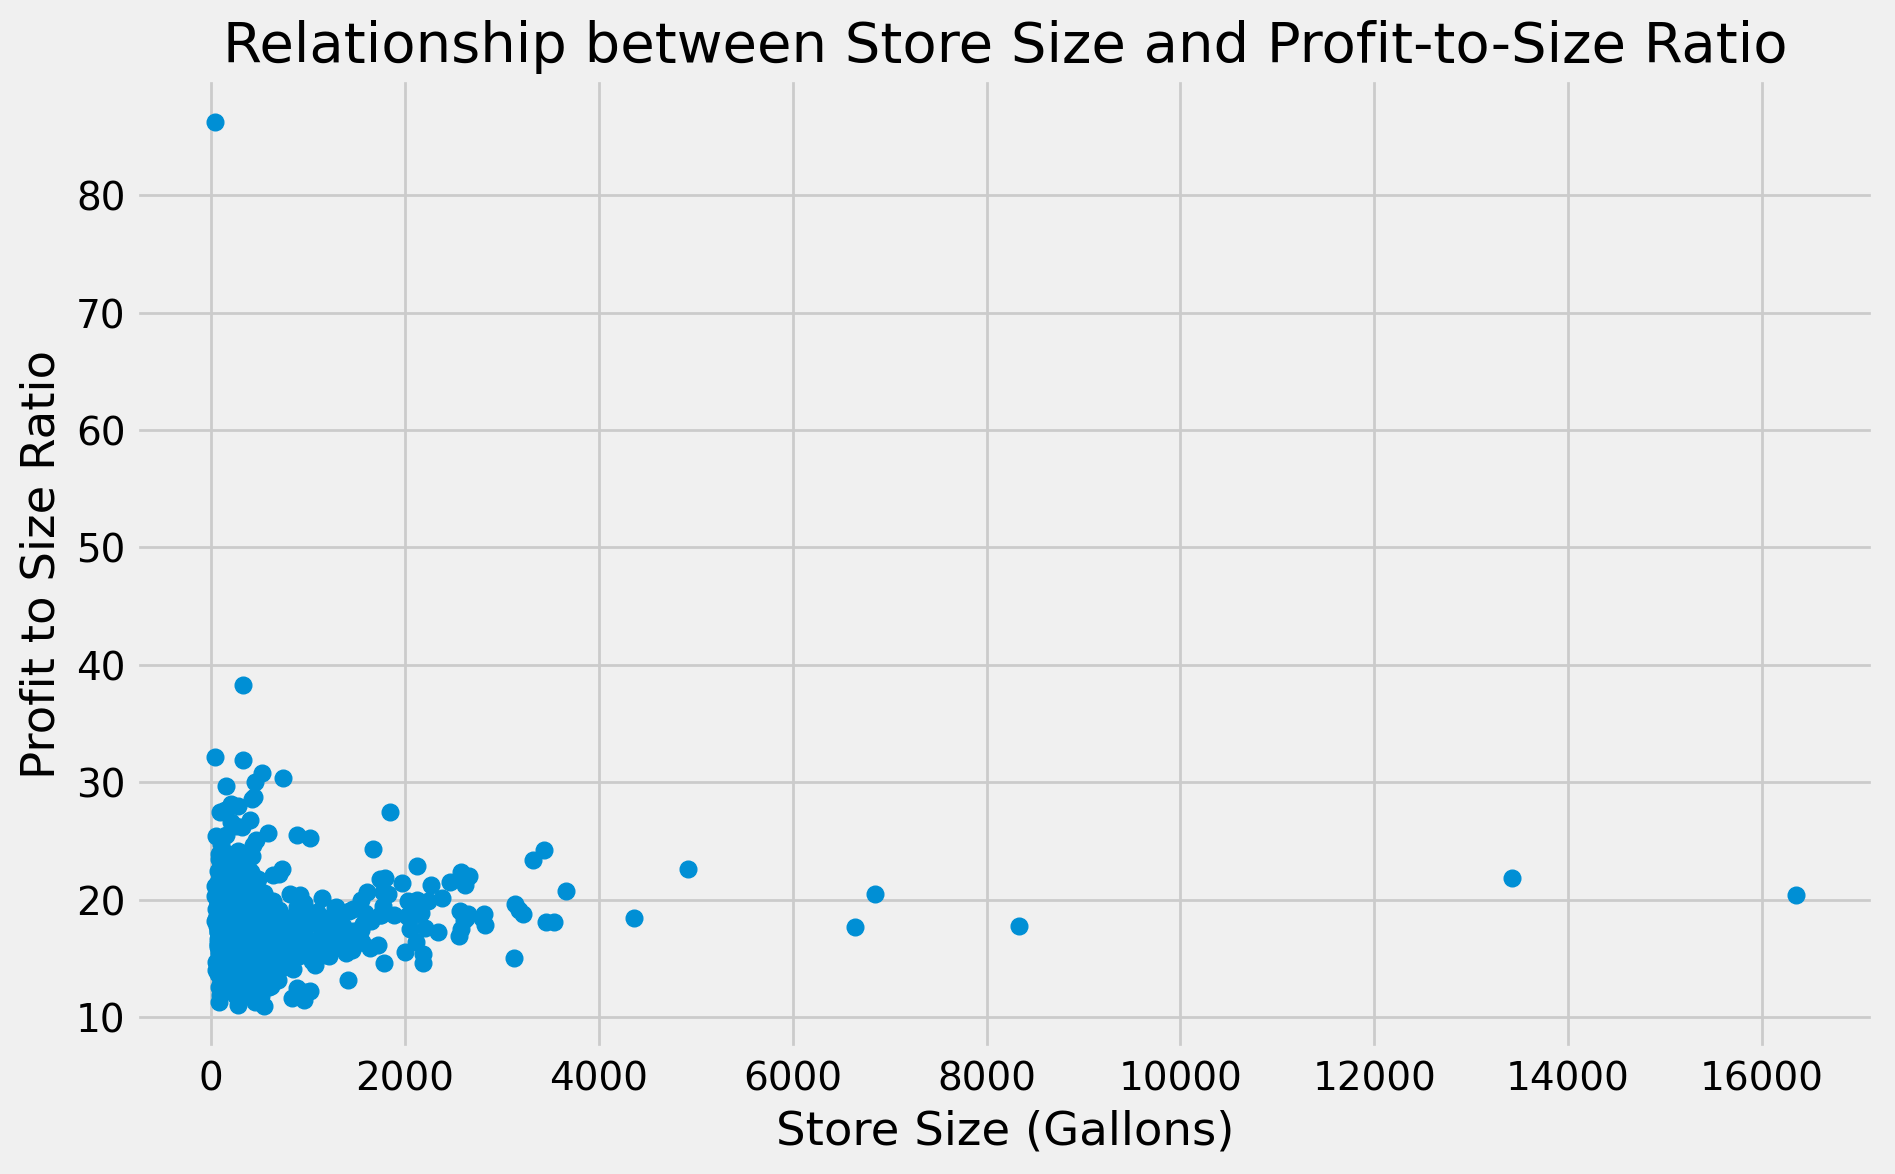

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate total gallons sold per store in 2015
store_size_2015 = filtered_df[filtered_df['Year'] == 2015].groupby('Store Number')['Volume Sold (Liters)'].sum() * 0.264172

# Create a DataFrame with store size and profit
store_profit_size = pd.DataFrame({'Store_Size': store_size_2015, 'Profit': profit_by_store_2015})

# Calculate the profit to store size ratio
store_profit_size['Profit_to_Size_Ratio'] = store_profit_size['Profit'] / store_profit_size['Store_Size']

#Investigate the relationship between store size and profit ratio
print(store_profit_size.sort_values(by='Store_Size'))

# Calculate the correlation between store size and profit-to-size ratio
correlation = store_profit_size['Store_Size'].corr(store_profit_size['Profit_to_Size_Ratio'])
print(f"\nCorrelation between store size and profit-to-size ratio: {correlation}")

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.scatter(store_profit_size['Store_Size'], store_profit_size['Profit_to_Size_Ratio'])
plt.xlabel('Store Size (Gallons)')
plt.ylabel('Profit to Size Ratio')
plt.title('Relationship between Store Size and Profit-to-Size Ratio')
plt.grid(True)
plt.show()

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [ ]:
# Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.
df['Category Name'] = df['Category Name'].fillna('Unknown')
# Create a broader category for liquor type
if 'Category Name' in df.columns:
    def categorize_liquor(category):
        if 'vodka' in category.lower():
            return 'Vodka'
        elif 'whisky' in category.lower() or 'whiskey' in category.lower():
            return 'Whiskey'
        elif 'rum' in category.lower():
            return 'Rum'
        elif 'gin' in category.lower():
            return 'Gin'
        elif 'tequila' in category.lower() or 'mezcal' in category.lower():
            return 'Tequila/Mezcal'
        elif 'brandy' in category.lower():
            return 'Brandy'
        elif 'liqueur' in category.lower():
            return 'Liqueur'
        elif 'wine' in category.lower():
            return 'Wine'
        elif 'beer' in category.lower():
            return 'Beer'
        else:
            return 'Other'

    df['Liquor_Category'] = df['Category Name'].apply(categorize_liquor)


### 5.6 Do relationships exist between the broader liquor type and profit?

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel(io.BytesIO(uploaded['Iowa_Liquor_sales_sample_10pct.xlsx']))

# Display the first few rows and column names
print(df.head())
print("\nColumn names:")
print(df.columns)

        Date  Store Number         City Zip Code  County Number      County  \
0 2015-11-04          3717       SUMNER    50674            9.0      Bremer   
1 2016-03-02          2614    DAVENPORT    52807           82.0       Scott   
2 2016-02-11          2106  CEDAR FALLS    50613            7.0  Black Hawk   
3 2016-02-03          2501         AMES    50010           85.0       Story   
4 2015-08-18          3654      BELMOND    50421           99.0      Wright   

    Category              Category Name  Vendor Number  Item Number  \
0  1051100.0           APRICOT BRANDIES             55        54436   
1  1011100.0           BLENDED WHISKIES            395        27605   
2  1011200.0  STRAIGHT BOURBON WHISKIES             65        19067   
3  1071100.0         AMERICAN COCKTAILS            395        59154   
4  1031080.0             VODKA 80 PROOF            297        35918   

            Item Description  Bottle Volume (ml)  State Bottle Cost  \
0  Mr. Boston Apricot Brand

In [ ]:
# Profit = (Retail Price - Cost Price) * Number of Bottles Sold
df['Profit'] = (df['State Bottle Retail'] - df['State Bottle Cost']) * df['Bottles Sold']

In [ ]:
def categorize_liquor(category):
    if isinstance(category, str):
        category = category.lower()
        if 'vodka' in category:
            return 'Vodka'
        elif 'whisk' in category:  # covers 'whiskey' and 'whisky'
            return 'Whiskey'
        elif 'rum' in category:
            return 'Rum'
        elif 'gin' in category:
            return 'Gin'
        elif 'tequila' in category or 'mezcal' in category:
            return 'Tequila/Mezcal'
        elif 'brandy' in category:
            return 'Brandy'
        elif 'liqueur' in category:
            return 'Liqueur'
        elif 'wine' in category:
            return 'Wine'
        elif 'beer' in category:
            return 'Beer'
    return 'Other'

df['Liquor_Category'] = df['Category Name'].apply(categorize_liquor)


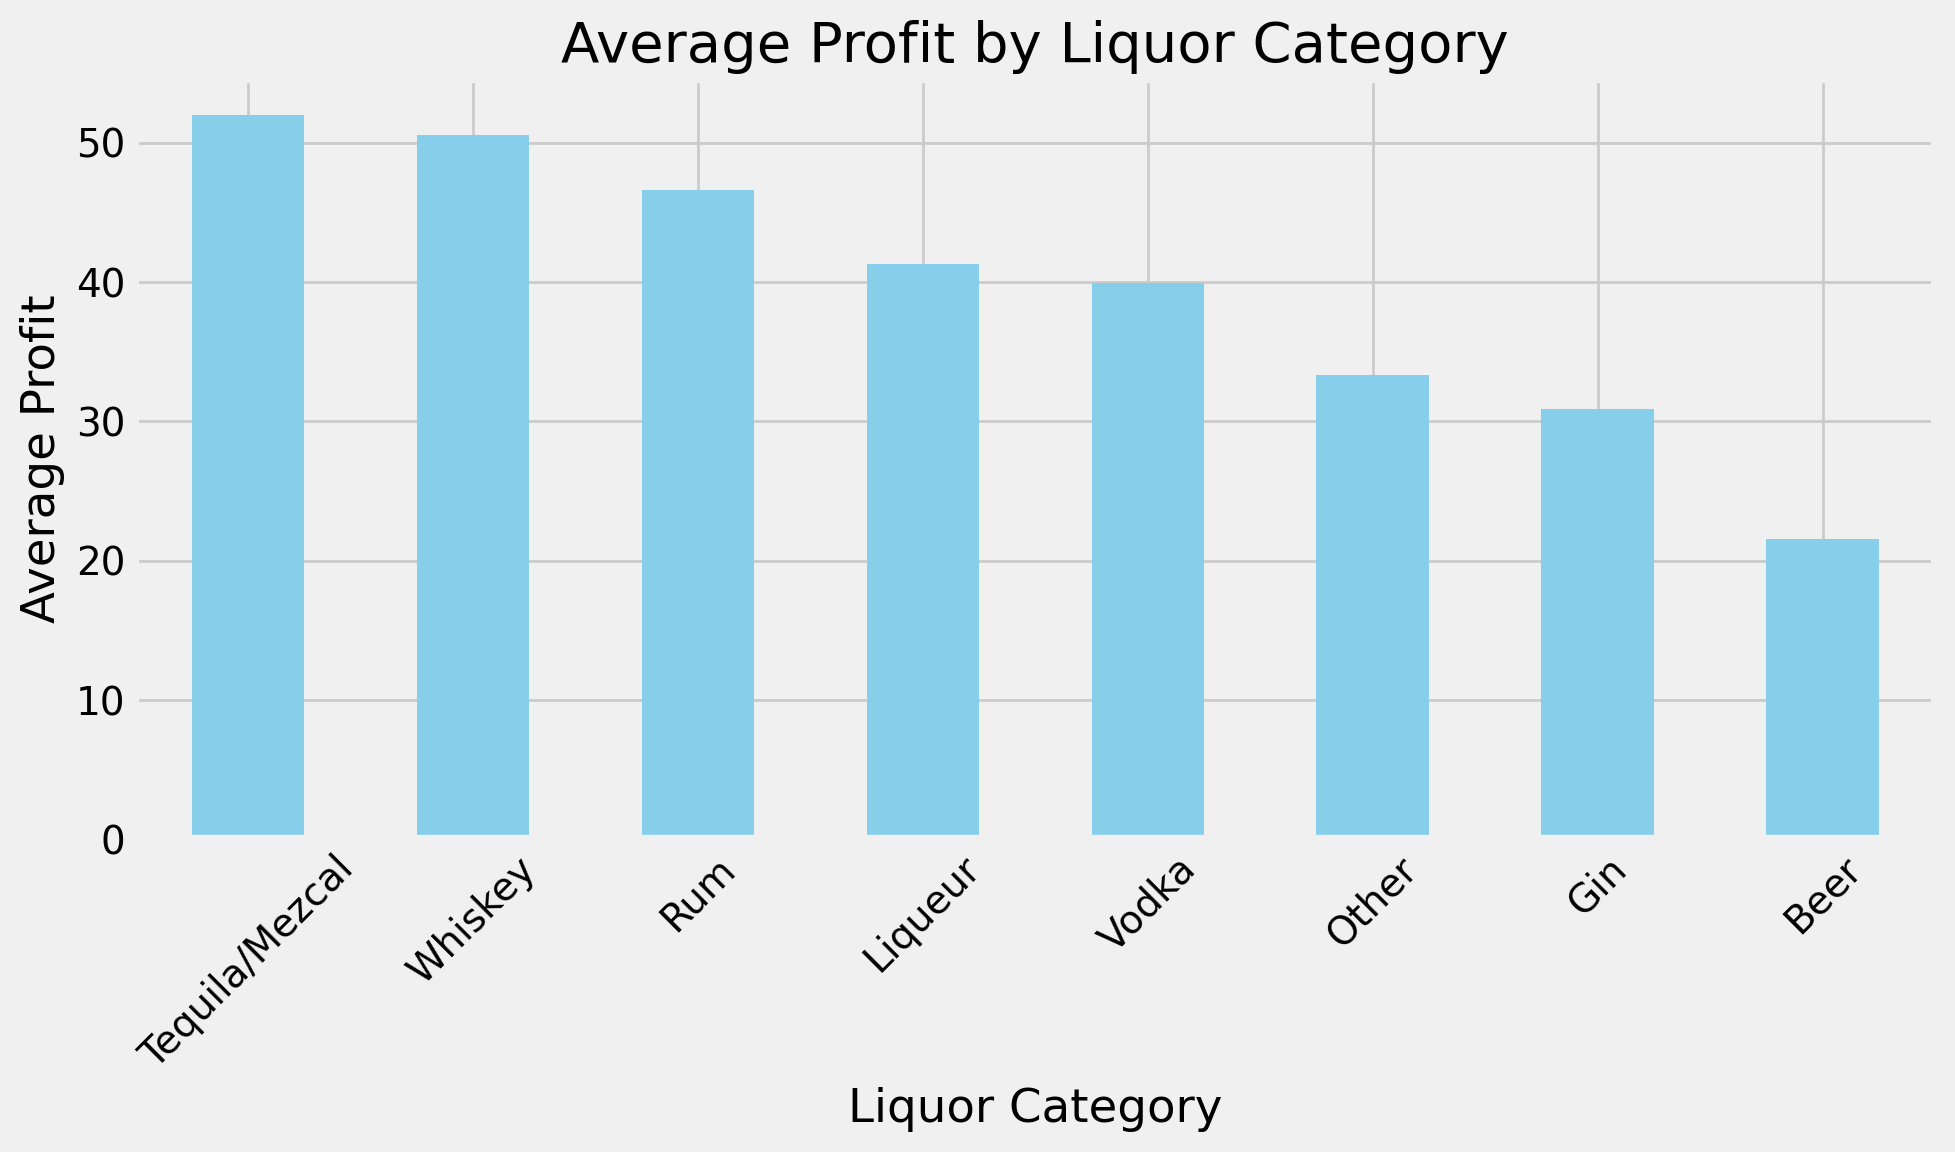

In [ ]:
import matplotlib.pyplot as plt

# Group by Liquor Category and calculate average profit
liquor_profit = df.groupby('Liquor_Category')['Profit'].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
liquor_profit.plot(kind='bar', color='skyblue')
plt.xlabel('Liquor Category')
plt.ylabel('Average Profit')
plt.title('Average Profit by Liquor Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

Top 10 Brands by Sales:
                               Sale (Dollars)     Profit
Item Description                                        
Black Velvet                       1345504.19  460406.05
Jack Daniels Old #7 Black Lbl      1092299.17  364167.82
Captain Morgan Spiced Rum          1073028.70  357809.70
Fireball Cinnamon Whiskey           826591.56  275575.82
Crown Royal Canadian Whisky         742883.47  247675.08
Absolut Swedish Vodka 80 Prf        618381.06  206227.25
Hawkeye Vodka                       608868.76  203141.28
Grey Goose Vodka                    560885.09  186978.48
Jameson                             467322.43  155832.99
Jagermeister Liqueur                448539.44  149544.05

Top 10 Brands by Profit:
                               Sale (Dollars)     Profit
Item Description                                        
Black Velvet                       1345504.19  460406.05
Jack Daniels Old #7 Black Lbl      1092299.17  364167.82
Captain Morgan Spiced Rum          107

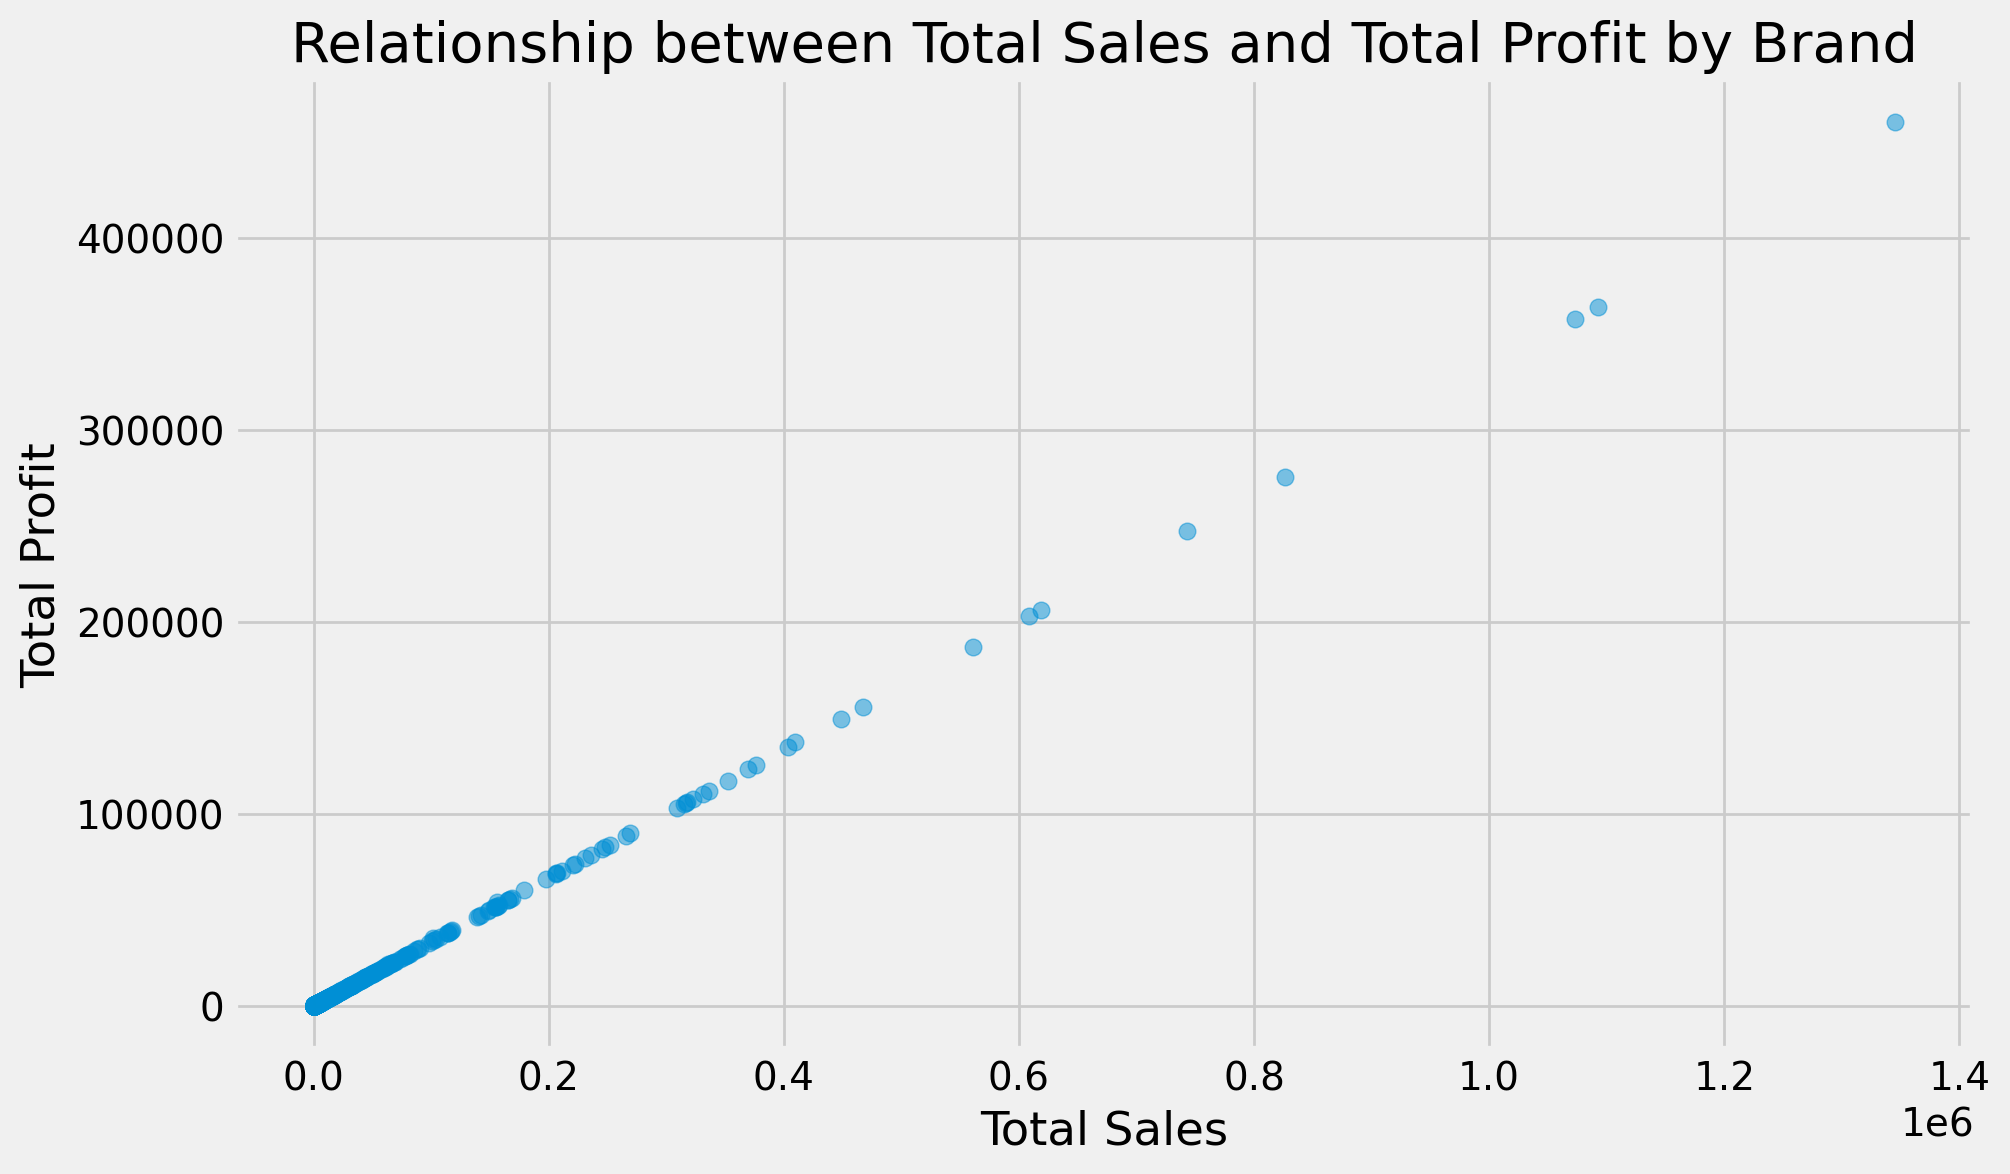

In [ ]:
import matplotlib.pyplot as plt
# Group by 'Item Description' (brand) and calculate total sales and profit
brand_performance = filtered_df.groupby('Item Description').agg({'Sale (Dollars)': 'sum', 'Profit': 'sum'})

# Sort by total sales and profit
top_brands_sales = brand_performance.sort_values('Sale (Dollars)', ascending=False)
top_brands_profit = brand_performance.sort_values('Profit', ascending=False)

print("Top 10 Brands by Sales:")
print(top_brands_sales.head(10))

print("\nTop 10 Brands by Profit:")
print(top_brands_profit.head(10))

# Visualize the relationship (example: scatter plot of sales vs. profit)
plt.figure(figsize=(10, 6))
plt.scatter(brand_performance['Sale (Dollars)'], brand_performance['Profit'], alpha=0.5)
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.title('Relationship between Total Sales and Total Profit by Brand')
plt.grid(True)
plt.show()


### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [ ]:
# Step 1: Create Profit Column
df['Profit'] = df['State Bottle Retail'] - df['State Bottle Cost']
df['Total_Profit'] = df['Profit'] * df['Bottles Sold']

In [ ]:
# Step 2: Categorize Liquor
def categorize_liquor(category):
    if pd.isna(category):
        return 'Other'
    category = category.lower()
    if 'vodka' in category:
        return 'Vodka'
    elif 'whisky' in category or 'whiskey' in category:
        return 'Whiskey'
    elif 'rum' in category:
        return 'Rum'
    elif 'gin' in category:
        return 'Gin'
    elif 'tequila' in category or 'mezcal' in category:
        return 'Tequila/Mezcal'
    elif 'brandy' in category:
        return 'Brandy'
    elif 'liqueur' in category:
        return 'Liqueur'
    elif 'wine' in category:
        return 'Wine'
    elif 'beer' in category:
        return 'Beer'
    else:
        return 'Other'

df['Liquor_Category'] = df['Category Name'].apply(categorize_liquor)

In [ ]:
# Step 3: Define Category Multiplier Tax
def category_tax(category):
    if category in ['Vodka', 'Whiskey', 'Tequila/Mezcal']:
        return 0.10
    elif category in ['Gin', 'Brandy', 'Liqueur']:
        return 0.05
    elif category in ['Beer', 'Wine']:
        return 0.02
    else:
        return 0.00

df['Category_Tax'] = df['Liquor_Category'].apply(category_tax)

In [ ]:
# Step 4: Define Bottle Size Surcharge
def volume_tax(ml):
    if ml >= 1000:
        return 0.03
    elif ml >= 750:
        return 0.01
    else:
        return 0.00

df['Volume_Tax'] = df['Bottle Volume (ml)'].apply(volume_tax)

In [ ]:
# Step 5: Define Profit-based Tax
def profit_tax(profit):
    return 0.02 if profit > 100 else 0.00

df['Profit_Tax'] = df['Total_Profit'].apply(profit_tax)

In [ ]:
# --- Step 6: Combine All Tax Rates ---
df['Total_Tax_Rate'] = df['Category_Tax'] + df['Volume_Tax'] + df['Profit_Tax']

# --- Step 7: Calculate Tax Amount (on Sale Value) ---
df['Tax_Amount'] = df['Sale (Dollars)'] * df['Total_Tax_Rate']

# --- Step 8: Summary Output ---
tax_summary = df.groupby('Liquor_Category')[['Sale (Dollars)', 'Tax_Amount']].sum()
tax_summary['Effective_Tax_%'] = (tax_summary['Tax_Amount'] / tax_summary['Sale (Dollars)']) * 100

print(tax_summary.sort_values(by='Tax_Amount', ascending=False))

                 Sale (Dollars)    Tax_Amount  Effective_Tax_%
Liquor_Category                                               
Vodka                8362059.94  1.059661e+06        12.672252
Other               15151511.92  4.094229e+05         2.702192
Tequila/Mezcal       1886724.18  2.360612e+05        12.511698
Whiskey              1805856.54  2.318261e+05        12.837461
Liqueur              2211680.84  1.609821e+05         7.278720
Rum                  4570240.95  1.385930e+05         3.032510
Gin                   917566.84  6.832761e+04         7.446608
Beer                   21101.74  9.767304e+02         4.628672


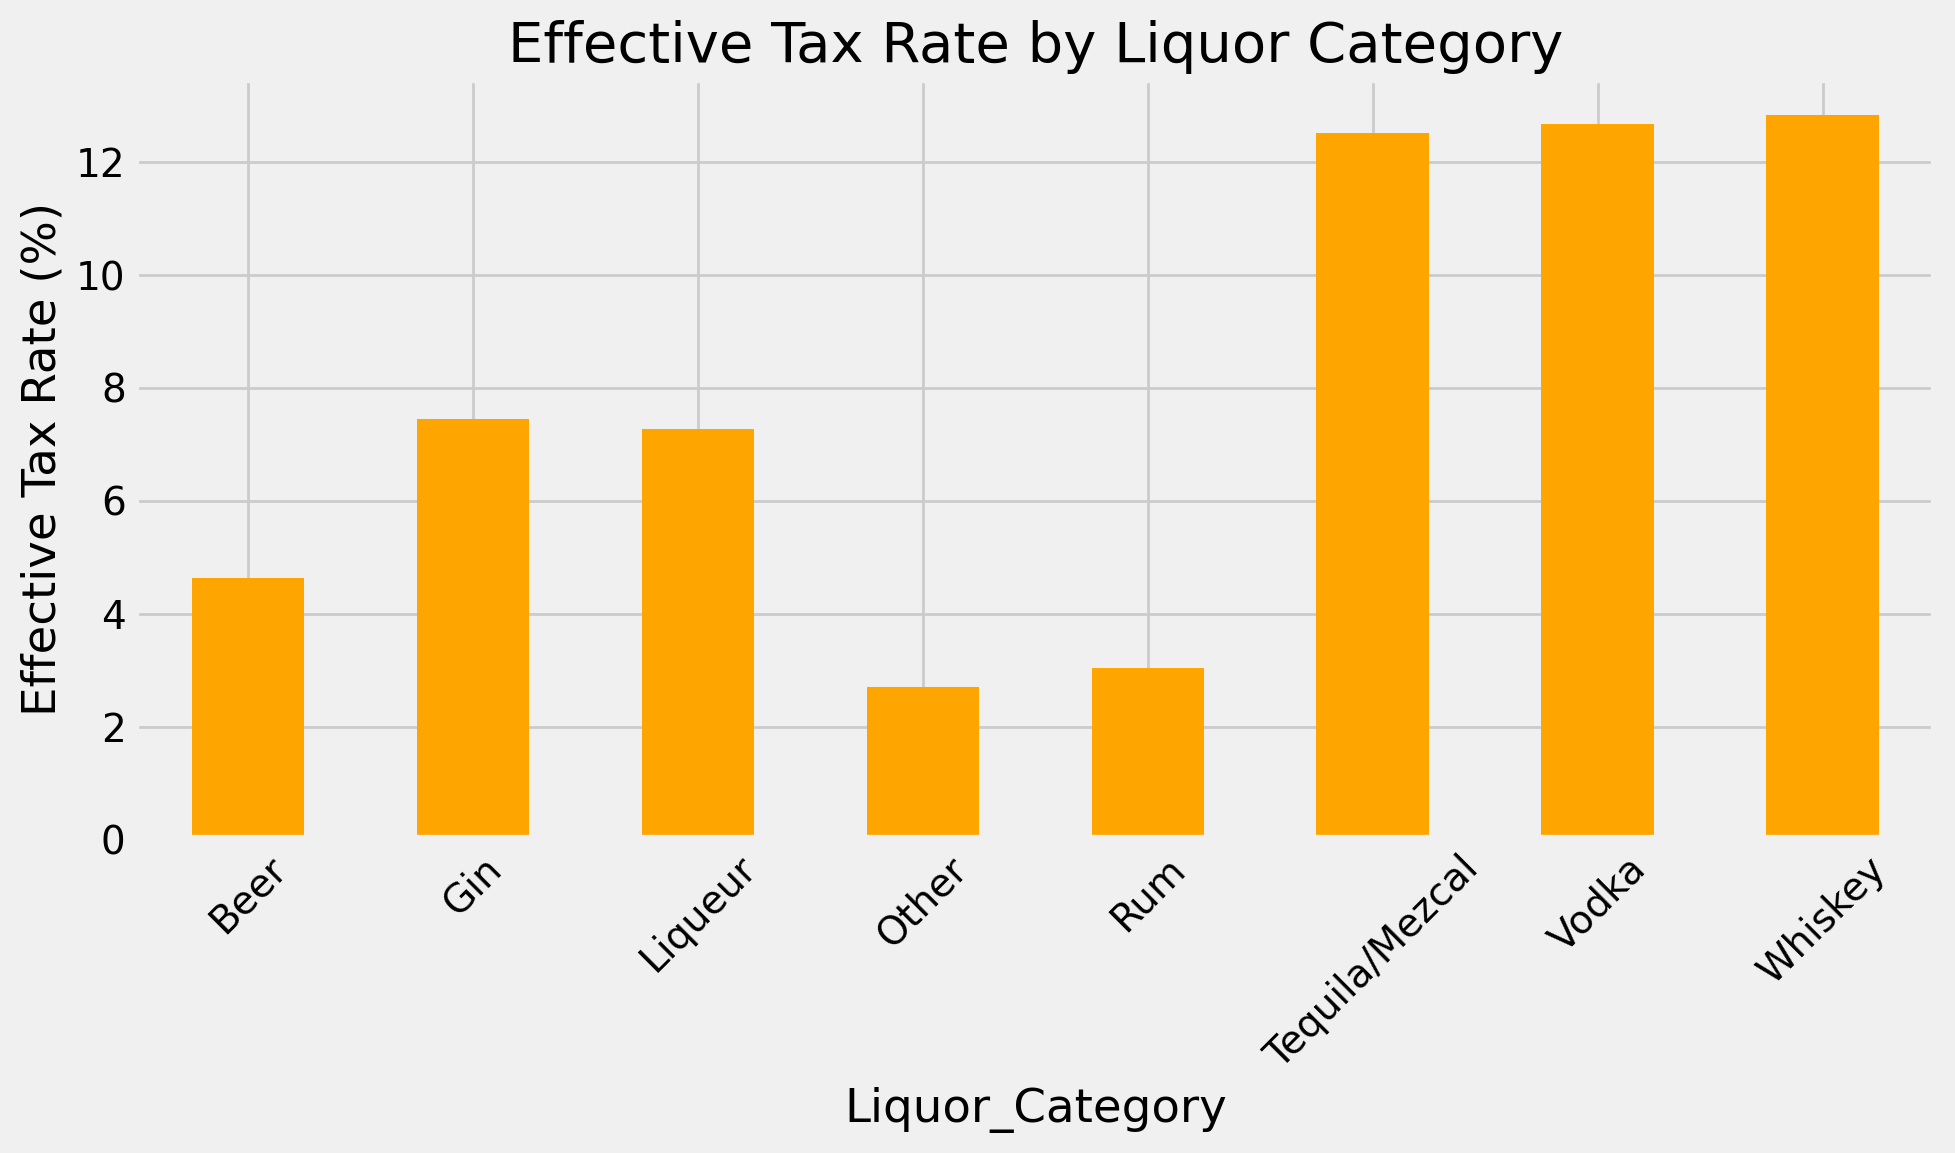

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
tax_summary['Effective_Tax_%'].plot(kind='bar', color='orange')
plt.ylabel('Effective Tax Rate (%)')
plt.title('Effective Tax Rate by Liquor Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## 6. Case 2 = Market research for new store locations

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016.

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [ ]:
import pandas as pd

# Step 1: Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Filter for Q1 2015 and Q1 2016
q1_2015 = df[(df['Date'].dt.year == 2015) & (df['Date'].dt.month <= 3)]
q1_2016 = df[(df['Date'].dt.year == 2016) & (df['Date'].dt.month <= 3)]

# Step 3: Group sales by City
q1_2015_sales = q1_2015.groupby('City')['Sale (Dollars)'].sum().reset_index()
q1_2015_sales.rename(columns={'Sale (Dollars)': 'Q1_2015_Sales'}, inplace=True)

q1_2016_sales = q1_2016.groupby('City')['Sale (Dollars)'].sum().reset_index()
q1_2016_sales.rename(columns={'Sale (Dollars)': 'Q1_2016_Sales'}, inplace=True)

# Step 4: Merge both years on City
q1_sales = pd.merge(q1_2015_sales, q1_2016_sales, on='City', how='inner')

# Step 5: Calculate growth
q1_sales['Growth ($)'] = q1_sales['Q1_2016_Sales'] - q1_sales['Q1_2015_Sales']
q1_sales['Growth (%)'] = (q1_sales['Growth ($)'] / q1_sales['Q1_2015_Sales']) * 100

# Optional: Sort by highest growth %
q1_sales_sorted = q1_sales.sort_values(by='Growth (%)', ascending=False)

# Display top 10 high-growth cities
print(q1_sales_sorted.head(10))

              City  Q1_2015_Sales  Q1_2016_Sales  Growth ($)   Growth (%)
247        OKOBOJI          11.21         944.98      933.77  8329.794826
149  HARPERS FERRY          60.12         883.47      823.35  1369.510978
307       STANWOOD         148.80        1615.68     1466.88   985.806452
314          SULLY          60.84         593.88      533.04   876.134122
287       SCRANTON         121.44         959.01      837.57   689.698617
22         AURELIA          79.20         558.24      479.04   604.848485
268      POSTVILLE         275.79        1513.17     1237.38   448.667464
343      WELLSBURG         194.40        1053.54      859.14   441.944444
78        DANVILLE          99.90         510.40      410.50   410.910911
137    GRAND MOUND         337.20        1694.93     1357.73   402.648280


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward.

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Use the q1_sales dataframe from previous step

# Drop rows with missing or zero 2015 sales to avoid divide-by-zero errors
q1_sales_clean = q1_sales[(q1_sales['Q1_2015_Sales'] > 0) & q1_sales['Growth (%)'].notnull()]

# Step 1: Normalize sales and growth
scaler = MinMaxScaler()
q1_sales_clean[['scaled_sales', 'scaled_growth']] = scaler.fit_transform(
    q1_sales_clean[['Q1_2016_Sales', 'Growth (%)']]
)

# Step 2: Create performance score
q1_sales_clean['Performance Score'] = (
    0.7 * q1_sales_clean['scaled_sales'] + 0.3 * q1_sales_clean['scaled_growth']
)

# Step 3: Sort by best locations
top_locations = q1_sales_clean.sort_values(by='Performance Score', ascending=False)

# View top 10 cities
print(top_locations[['City', 'Q1_2016_Sales', 'Growth (%)', 'Performance Score']].head(10))


                City  Q1_2016_Sales   Growth (%)  Performance Score
86        DES MOINES      814355.45     6.522113           0.703349
51      CEDAR RAPIDS      437361.85    -4.132659           0.378887
247          OKOBOJI         944.98  8329.794826           0.300754
79         DAVENPORT      319680.64    17.127731           0.278481
296       SIOUX CITY      261621.86    17.996791           0.228602
73    COUNCIL BLUFFS      250016.18    15.456138           0.218535
166        IOWA CITY      232506.06    12.613901           0.203381
337         WATERLOO      228750.20     9.478337           0.200040
348  WEST DES MOINES      222532.42     1.228162           0.194401
90           DUBUQUE      179402.17     6.156305           0.157500


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [ ]:

# The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

# Recommend a location based on the 'Performance Score' metric.
recommended_city = top_locations['City'].iloc[0]
print(f"Recommended Location: {recommended_city}")

# Explanation for the recommendation.
print(f"\nRecommendation Rationale:\n{recommended_city} is recommended due to its high performance score, which combines strong Q1 2016 sales with substantial growth from Q1 2015. This suggests a promising market with current demand and potential for future expansion.  The performance score considers both current sales figures and growth trends, mitigating the risk of selecting locations with high current sales but declining growth.")


Recommended Location: DES MOINES

Recommendation Rationale:
DES MOINES is recommended due to its high performance score, which combines strong Q1 2016 sales with substantial growth from Q1 2015. This suggests a promising market with current demand and potential for future expansion.  The performance score considers both current sales figures and growth trends, mitigating the risk of selecting locations with high current sales but declining growth.


### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [ ]:
# 1. What would be the best type of liquor to sell to maximize profit?

# Calculate profit by liquor category
liquor_profit = df.groupby('Liquor_Category')['Profit'].sum()

# Find the liquor category with the highest total profit
best_liquor_category = liquor_profit.idxmax()
print(f"The best liquor category to maximize profit is: {best_liquor_category}")


# 2. Should the recommended location change if he is only selling one type of liquor?

# Analyze sales and growth of the best liquor category by city
best_liquor_df = df[df['Liquor_Category'] == best_liquor_category]

# Repeat the steps from 6.1 and 6.2 but with the filtered data
# Step 1: Convert 'Date' to datetime (already done)
# Step 2: Filter for Q1 2015 and Q1 2016
q1_2015_best = best_liquor_df[(best_liquor_df['Date'].dt.year == 2015) & (best_liquor_df['Date'].dt.month <= 3)]
q1_2016_best = best_liquor_df[(best_liquor_df['Date'].dt.year == 2016) & (best_liquor_df['Date'].dt.month <= 3)]

# Step 3: Group sales by City
q1_2015_sales_best = q1_2015_best.groupby('City')['Sale (Dollars)'].sum().reset_index()
q1_2015_sales_best.rename(columns={'Sale (Dollars)': 'Q1_2015_Sales'}, inplace=True)

q1_2016_sales_best = q1_2016_best.groupby('City')['Sale (Dollars)'].sum().reset_index()
q1_2016_sales_best.rename(columns={'Sale (Dollars)': 'Q1_2016_Sales'}, inplace=True)

# Step 4: Merge both years on City
q1_sales_best = pd.merge(q1_2015_sales_best, q1_2016_sales_best, on='City', how='inner')

# Step 5: Calculate growth
q1_sales_best['Growth ($)'] = q1_sales_best['Q1_2016_Sales'] - q1_sales_best['Q1_2015_Sales']
q1_sales_best['Growth (%)'] = (q1_sales_best['Growth ($)'] / q1_sales_best['Q1_2015_Sales']) * 100


q1_sales_best_clean = q1_sales_best[(q1_sales_best['Q1_2015_Sales'] > 0) & q1_sales_best['Growth (%)'].notnull()]
scaler = MinMaxScaler()
q1_sales_best_clean[['scaled_sales', 'scaled_growth']] = scaler.fit_transform(
    q1_sales_best_clean[['Q1_2016_Sales', 'Growth (%)']]
)
q1_sales_best_clean['Performance Score'] = (
    0.7 * q1_sales_best_clean['scaled_sales'] + 0.3 * q1_sales_best_clean['scaled_growth']
)
top_locations_best = q1_sales_best_clean.sort_values(by='Performance Score', ascending=False)
new_recommended_city = top_locations_best['City'].iloc[0]


print(f"\nRecommended Location considering only {best_liquor_category}: {new_recommended_city}")

if recommended_city == new_recommended_city:
    print("\nThe recommended location does not change when considering only the most profitable liquor type.")
else:
    print("\nThe recommended location changes when considering only the most profitable liquor type.")


The best liquor category to maximize profit is: Other

Recommended Location considering only Other: DES MOINES

The recommended location does not change when considering only the most profitable liquor type.
